# **Image classification with Tensorflow**

Reference 1: 
https://www.tensorflow.org/tutorials/keras/classification

Reference 2: 
https://github.com/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb

#Import libraries 

In [54]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt #helper libraries 

#Import Dataset

To build our model we use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which is made up of 10 categories with 70,000 grayscale images of 28 x 28 pixels.

Here we have 60,000 images for model training and 10,000 image to evaluate the performance of our model. The dataset can be found at [Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>



In [55]:
#Lets import the fashion mnist
fashion_data = keras.datasets.fashion_mnist

In [56]:
#Lets create of numpy array of training and testing data 
(train_images, train_labels),(test_images, test_labels)= fashion_data.load_data()


In [57]:
#We create a list of the categories
class_names=['Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']

## Exploratory Data Analysis

In [58]:
#Lets check the shape of our training images and testing images
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [59]:
# training labels size
len(train_labels), len(test_images)

(60000, 10000)

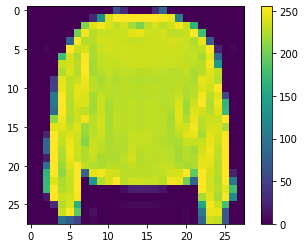

In [60]:
#Lets view a sample image at index 7 of our training data 
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()


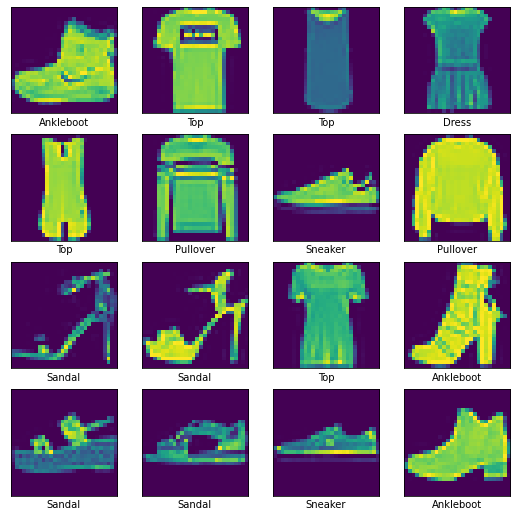

In [61]:
#Lets look at 16 samples from our training data
plt.figure(figsize=(9,9))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()  

#Model training 

In [62]:
#Step 1:  Model configuration
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(64, activation="relu"),
                        keras.layers.Dense(10,activation="softmax")

])

#Here we flatten the data 


In [63]:
#Step 2: Compiling the model, we add the loss, optimizer and evaluation metrics here
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [64]:
#Step 3: We fit our data to the model 
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2867 - accuracy: 0.6196
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8012 - accuracy: 0.7029
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7218 - accuracy: 0.7177
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6611 - accuracy: 0.7363
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6273 - accuracy: 0.7425
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6181 - accuracy: 0.7461
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5985 - accuracy: 0.7653
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5654 - accuracy: 0.7904
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5623 - accuracy: 0.7909
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.549

#Model Evaluation

In [65]:
test_loss, test_acc =model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.6279 - accuracy: 0.7776
Test Accuracy:  0.7775999903678894


In [66]:
predictions=model.predict(test_images)

In [67]:
np.argmax(predictions[0]),test_labels[0]

(9, 9)

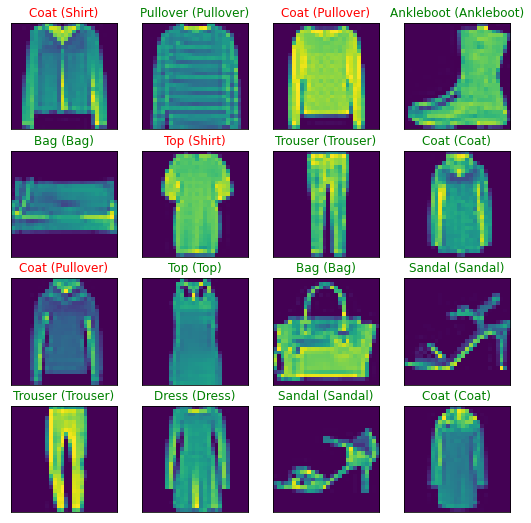

In [68]:
# Let us plot 16 random images and compare the labels with the model's prediction
figure = plt.figure(figsize=(9, 9))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=16, replace=False)):
    ax = figure.add_subplot(4,4, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(predictions[index])
    true_index = test_labels[index]
    # Set the title for each image
    ax.set_title(f"{class_names[predict_index]} ({class_names[true_index]})",
                                  color=("green" if predict_index == true_index else "red"))

How do we improve the model's performance? In the next chapter we will look at a model centric approach to improve the performance of our model. 